In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
from feature_engine.discretisation import EqualWidthDiscretiser,EqualFrequencyDiscretiser,DecisionTreeDiscretiser
from feature_engine.encoding import OrdinalEncoder
from matplotlib import pyplot as plt
from sklearn.datasets import load_boston
from sklearn.preprocessing import KBinsDiscretizer

In [29]:
data_set = load_boston()
data_set

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

## Dividing the variable into intervals of equal width
In equal-width discretization, the variable values are sorted into intervals of the same width. The number of
intervals is decided arbitrarily and the width is determined by the range of values of the variable and the number
of bins to create.

In [30]:
data = pd.DataFrame(data_set['data'],columns=data_set['feature_names'])
data['target'] = data_set['target']
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [31]:
disc = EqualWidthDiscretiser(variables=['target'])
disc.fit(data)
disc.binner_dict_

{'target': [-inf, 9.5, 14.0, 18.5, 23.0, 27.5, 32.0, 36.5, 41.0, 45.5, inf]}

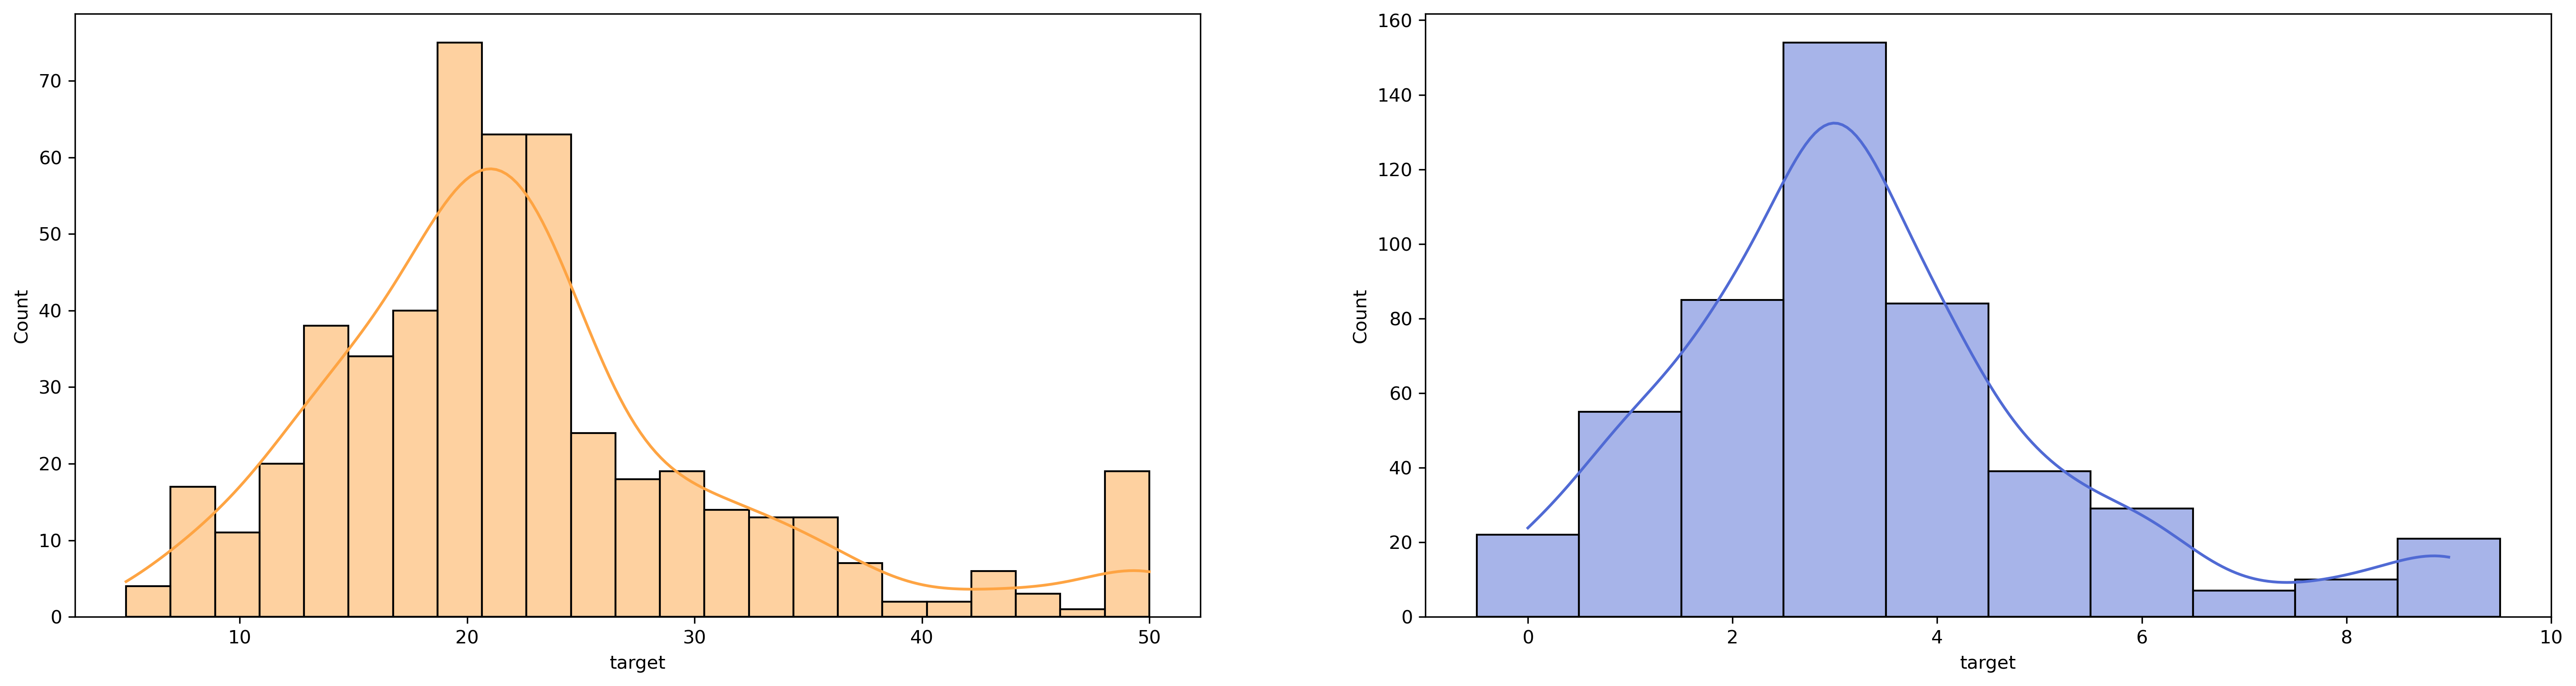

In [32]:
data_tar_disc = disc.transform(data)

fig,axes = plt.subplots(nrows=1,ncols=2,figsize=[24,6],dpi=300)
axes = axes.ravel()
sns.histplot(x=data.target,kde=True,color='#FEA443',ax=axes[0])
sns.histplot(x=data_tar_disc.target,kde=True,discrete=True,color='#506AD4',ax=axes[1])
plt.show()
